In [137]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
import seaborn as sns
from scipy.spatial.distance import cdist

In [298]:
data = pd.read_csv('data/odi_batting_data.csv')
data

,Unnamed: 0,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,Unnamed: 13
0,0,SR Tendulkar (INDIA),1989-2012,439,436,36,17908,200*,44.77,20772,86.21,48,94,19,NaN
1,1,KC Sangakkara (Asia/ICC/SL),2000-2015,386,370,39,13942,169,42.12,17618,79.13,25,90,15,NaN
2,2,RT Ponting (AUS/ICC),1995-2012,363,355,38,13470,164,42.49,16727,80.52,30,81,19,NaN
3,3,ST Jayasuriya (Asia/SL),1989-2011,429,423,15,12987,189,31.83,14252,91.12,27,64,33,NaN
4,4,DPMD Jayawardene (Asia/SL),1998-2015,430,407,36,12429,144,33.5,15719,79.06,19,75,27,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2695,45,BB Sran (INDIA),2016-2016,6,-,-,-,-,-,-,-,-,-,-,NaN
2696,46,LW Stott (NZ),1979-1979,1,-,-,-,-,-,-,-,-,-,-,NaN
2697,47,EP Thompson (NZ),2009-2009,1,-,-,-,-,-,-,-,-,-,-,NaN
2698,48,AL Thomson (AUS),1971-1971,1,-,-,-,-,-,-,-,-,-,-,NaN


In [299]:
data = data.drop(columns=['Unnamed: 0', 'Unnamed: 13'])

In [300]:
data

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0
0,SR Tendulkar (INDIA),1989-2012,439,436,36,17908,200*,44.77,20772,86.21,48,94,19
1,KC Sangakkara (Asia/ICC/SL),2000-2015,386,370,39,13942,169,42.12,17618,79.13,25,90,15
2,RT Ponting (AUS/ICC),1995-2012,363,355,38,13470,164,42.49,16727,80.52,30,81,19
3,ST Jayasuriya (Asia/SL),1989-2011,429,423,15,12987,189,31.83,14252,91.12,27,64,33
4,DPMD Jayawardene (Asia/SL),1998-2015,430,407,36,12429,144,33.5,15719,79.06,19,75,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2695,BB Sran (INDIA),2016-2016,6,-,-,-,-,-,-,-,-,-,-
2696,LW Stott (NZ),1979-1979,1,-,-,-,-,-,-,-,-,-,-
2697,EP Thompson (NZ),2009-2009,1,-,-,-,-,-,-,-,-,-,-
2698,AL Thomson (AUS),1971-1971,1,-,-,-,-,-,-,-,-,-,-


In [301]:
data = data.replace('-', '0.0')
data['HS'] = data['HS'].str.replace('*', '')
data.iloc[:, 2:7] = data.iloc[:, 2:7].astype(float).astype(int)
data['Ave'] = data['Ave'].astype(float)
data.iloc[:, 8:] = data.iloc[:, 8:].astype(float).astype(int)

C:\Users\SAANKHYA\anaconda3\envs\torch1.7\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  


In [302]:
data

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0
0,SR Tendulkar (INDIA),1989-2012,439,436,36,17908,200,44.77,20772,86,48,94,19
1,KC Sangakkara (Asia/ICC/SL),2000-2015,386,370,39,13942,169,42.12,17618,79,25,90,15
2,RT Ponting (AUS/ICC),1995-2012,363,355,38,13470,164,42.49,16727,80,30,81,19
3,ST Jayasuriya (Asia/SL),1989-2011,429,423,15,12987,189,31.83,14252,91,27,64,33
4,DPMD Jayawardene (Asia/SL),1998-2015,430,407,36,12429,144,33.50,15719,79,19,75,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2695,BB Sran (INDIA),2016-2016,6,0,0,0,0,0.00,0,0,0,0,0
2696,LW Stott (NZ),1979-1979,1,0,0,0,0,0.00,0,0,0,0,0
2697,EP Thompson (NZ),2009-2009,1,0,0,0,0,0.00,0,0,0,0,0
2698,AL Thomson (AUS),1971-1971,1,0,0,0,0,0.00,0,0,0,0,0


In [324]:
x = data.iloc[:200, 2:]
x

,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,Category
0,439,436,36,17908,200,44.77,20772,86,48,94,19,2
1,386,370,39,13942,169,42.12,17618,79,25,90,15,2
2,363,355,38,13470,164,42.49,16727,80,30,81,19,2
3,429,423,15,12987,189,31.83,14252,91,27,64,33,2
4,430,407,36,12429,144,33.50,15719,79,19,75,27,2
...,...,...,...,...,...,...,...,...,...,...,...,...
195,68,68,6,2408,167,38.83,3440,70,4,15,4,8
196,111,106,10,2396,101,24.95,3607,66,1,12,7,8
197,98,97,10,2393,172,27.50,3392,70,3,11,7,8
198,105,105,1,2371,99,22.79,3788,62,0,16,8,8


In [325]:
x = np.array(x)
x = (x - x.mean(axis=0))/x.std(axis=0)

In [326]:
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 10)
 
for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k).fit(x)
    kmeanModel.fit(x)
 
    distortions.append(sum(np.min(cdist(x, kmeanModel.cluster_centers_,
                                        'euclidean'), axis=1)) / x.shape[0])
    inertias.append(kmeanModel.inertia_)
 
    mapping1[k] = sum(np.min(cdist(x, kmeanModel.cluster_centers_,
                                   'euclidean'), axis=1)) / x.shape[0]
    mapping2[k] = kmeanModel.inertia_

C:\Users\SAANKHYA\anaconda3\envs\torch1.7\lib\site-packages\sklearn\cluster\_kmeans.py:882: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  f"KMeans is known to have a memory leak on Windows "
C:\Users\SAANKHYA\anaconda3\envs\torch1.7\lib\site-packages\sklearn\cluster\_kmeans.py:882: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  f"KMeans is known to have a memory leak on Windows "


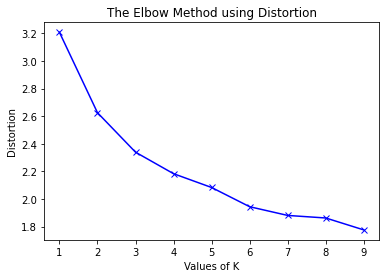

In [327]:
plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

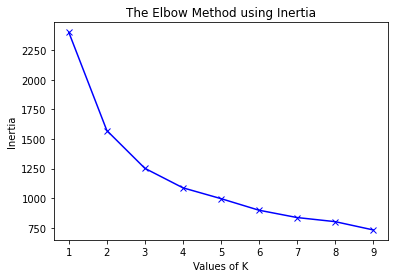

In [328]:

plt.plot(K, inertias, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()

In [329]:
n_cluster = 10
kmeans = KMeans(n_clusters=n_cluster).fit(x)

In [330]:
y = kmeans.labels_
y

array([5, 5, 5, 5, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1, 4, 4, 4,
       9, 4, 4, 3, 4, 6, 3, 1, 3, 3, 9, 3, 1, 3, 1, 1, 9, 3, 1, 9, 3, 9,
       3, 3, 3, 9, 3, 3, 9, 3, 9, 3, 3, 1, 6, 9, 9, 6, 9, 3, 6, 9, 1, 3,
       9, 9, 3, 9, 9, 9, 9, 6, 9, 6, 6, 7, 9, 9, 9, 6, 7, 9, 7, 3, 9, 6,
       9, 9, 6, 1, 2, 7, 1, 7, 7, 7, 6, 9, 2, 7, 6, 8, 1, 7, 7, 2, 2, 7,
       2, 7, 7, 2, 7, 7, 6, 8, 7, 8, 2, 7, 7, 1, 6, 7, 2, 8, 6, 7, 2, 8,
       7, 1, 6, 7, 7, 2, 7, 7, 2, 7, 7, 8, 2, 8, 2, 7, 7, 7, 2, 7, 0, 7,
       7, 2, 7, 2, 7, 8, 8, 0, 0, 0, 0, 7, 8, 0, 0, 0, 2, 0, 7, 7, 7, 0,
       2, 7, 8, 8, 0, 8, 0, 0, 0, 0, 0, 0, 0, 0, 8, 0, 0, 8, 0, 0, 8, 0,
       8, 8])

In [331]:
tsne = TSNE(n_components=2, verbose=1)
z = tsne.fit_transform(x)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 200 samples in 0.001s...
[t-SNE] Computed neighbors for 200 samples in 0.003s...
[t-SNE] Computed conditional probabilities for sample 200 / 200
[t-SNE] Mean sigma: 1.401359
[t-SNE] KL divergence after 250 iterations with early exaggeration: 56.946384
[t-SNE] KL divergence after 900 iterations: 0.367430


In [332]:
df = pd.DataFrame()
df['y'] = y
df["Component-1"] = z[:,0]
df["Component-2"] = z[:,1]

Text(0, 0.5, 'Component-2')

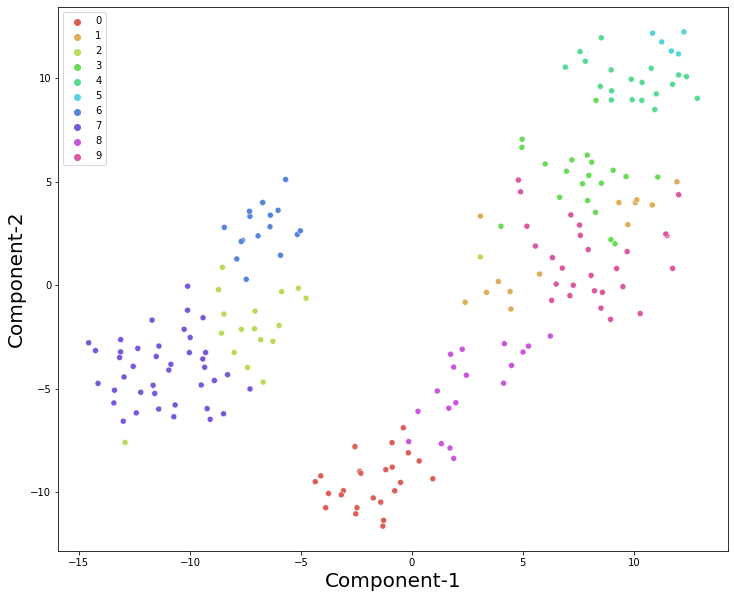

In [333]:
plt.figure(figsize=(12, 10))
sns.scatterplot(x="Component-1", y="Component-2", hue=df.y.tolist(),
                palette=sns.color_palette("hls", n_cluster),
                data=df, marker='o')
plt.xlabel('Component-1', fontsize=20)
plt.ylabel('Component-2', fontsize=20)

In [335]:
df = data.iloc[:200, :]
df['Category'] = y

C:\Users\SAANKHYA\anaconda3\envs\torch1.7\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [336]:
df[df['Category'] == 9]

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,Category
22,S Chanderpaul (WI),1994-2011,255,244,38,8606,150,41.77,12132,70,11,58,6,9
32,MJ Clarke (AUS),2003-2015,232,214,43,7661,117,44.80,9723,78,7,57,10,9
38,Javed Miandad (PAK),1975-1996,226,213,41,7336,119,42.65,10879,67,8,50,8,9
41,GC Smith (SA),2002-2013,190,190,10,6962,141,38.67,8587,81,10,47,7,9
43,MG Bevan (AUS),1994-2004,229,195,67,6856,108,53.56,9264,74,6,45,5,9
47,IVA Richards (WI),1975-1991,184,166,24,6689,189,47.10,7409,90,11,45,7,9
50,Mushfiqur Rahim (BAN),2006-2021,222,211,36,6559,144,37.48,8288,79,8,40,10,9
52,Shakib Al Hasan (BAN),2006-2021,211,201,29,6557,134,38.12,7971,82,9,49,11,9
57,RB Richardson (WI),1983-1996,219,214,30,6163,122,33.49,9641,63,5,43,8,9
58,JE Root (ENG),2013-2021,144,139,21,6061,133,51.36,6966,87,16,35,5,9


In [337]:
df[df['Category'] == 8]

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,Category
103,E Chigumbura (Afr/ZIM),2004-2018,211,198,26,4340,117,25.23,5423,80,2,19,17,8
117,RP Arnold (SL),1997-2007,175,152,41,3820,103,34.41,5271,72,1,26,7,8
119,HP Tillakaratne (SL),1986-2003,193,168,40,3789,104,29.60,6588,57,2,13,10,8
127,Imran Khan (PAK),1974-1992,171,148,39,3654,102,33.52,5011,72,1,19,6,8
131,L Klusener (SA),1996-2004,166,136,49,3541,103,40.70,3951,89,2,19,13,8
143,Moin Khan (PAK),1990-2004,216,181,40,3260,72,23.12,3995,81,0,12,17,8
145,AC Parore (NZ),1992-2002,168,155,29,3206,108,25.44,4714,68,1,14,19,8
159,DJ Bravo (WI),2004-2014,158,140,24,2941,112,25.35,3584,82,2,10,11,8
160,HH Streak (Afr/ZIM),1993-2005,182,157,55,2925,79,28.67,3960,73,0,13,6,8
166,AL Logie (WI),1981-1993,157,133,36,2809,109,28.95,3801,73,1,14,13,8


In [338]:
df[df['Category'] == 7]

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,Category
77,IR Bell (ENG),2004-2015,155,152,11,5294,141,37.54,6869,77,4,34,5,7
82,ADR Campbell (ZIM),1992-2003,183,180,13,5121,131,30.66,7685,66,7,30,10,7
84,CG Greenidge (WI),1975-1991,126,125,12,5105,133,45.17,7842,65,11,31,3,7
93,Aamer Sohail (PAK),1990-2000,153,152,5,4748,134,32.29,7234,65,5,31,10,7
95,AJ Stewart (ENG),1989-2003,164,160,14,4662,116,31.93,6815,68,4,28,13,7
96,MD Crowe (NZ),1982-1995,139,138,18,4632,107,38.60,6414,72,4,33,3,7
97,CD McMillan (NZ),1997-2007,185,178,16,4574,117,28.23,5999,76,3,27,9,7
101,NS Sidhu (INDIA),1987-1998,131,126,8,4410,134,37.37,6316,69,6,33,7,7
105,GR Marsh (AUS),1986-1992,115,114,6,4327,126,40.06,7738,55,9,22,4,7
106,GA Gooch (ENG),1976-1995,121,120,5,4274,142,37.16,6878,62,8,23,4,7


In [339]:
df[df['Category'] == 6]

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,Category
27,HM Amla (SA),2008-2019,175,173,12,8079,159,50.18,9128,88,27,39,4,6
56,S Dhawan (INDIA),2010-2022,143,142,7,6165,143,45.66,6587,93,17,34,5,6
59,KS Williamson (NZ),2010-2020,146,141,13,6043,148,47.21,7405,81,12,39,5,6
62,ML Hayden (AUS/ICC),1993-2008,153,148,13,5943,181,44.02,7515,79,10,35,9,6
73,F du Plessis (SA),2011-2019,140,135,19,5507,185,47.47,6208,88,12,35,3,6
75,Q de Kock (SA),2013-2022,122,122,3,5370,178,45.12,5589,96,16,26,4,6
76,DA Warner (AUS),2009-2020,123,123,5,5337,179,45.22,5577,95,18,22,2,6
81,AJ Finch (AUS),2013-2020,126,125,3,5200,153,42.62,5862,88,17,29,11,6
87,G Gambhir (INDIA),2003-2013,139,138,9,5052,150,39.16,5913,85,10,34,11,6
90,PR Stirling (IRE),2008-2022,128,128,2,4971,177,39.45,5677,87,12,26,10,6


In [340]:
df[df['Category'] == 5]

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,Category
0,SR Tendulkar (INDIA),1989-2012,439,436,36,17908,200,44.77,20772,86,48,94,19,5
1,KC Sangakkara (Asia/ICC/SL),2000-2015,386,370,39,13942,169,42.12,17618,79,25,90,15,5
2,RT Ponting (AUS/ICC),1995-2012,363,355,38,13470,164,42.49,16727,80,30,81,19,5
3,ST Jayasuriya (Asia/SL),1989-2011,429,423,15,12987,189,31.83,14252,91,27,64,33,5
4,DPMD Jayawardene (Asia/SL),1998-2015,430,407,36,12429,144,33.50,15719,79,19,75,27,5


In [341]:
df[df['Category'] == 4]

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,Category
5,V Kohli (INDIA),2008-2022,249,245,37,12195,183,58.62,13084,93,43,63,14,4
6,Inzamam-ul-Haq (Asia/PAK),1991-2007,369,343,53,11696,137,40.33,15734,74,10,83,17,4
7,JH Kallis (Afr/ICC/SA),1996-2014,318,306,48,11479,139,44.49,15678,73,17,85,16,4
8,SC Ganguly (Asia/INDIA),1992-2007,295,293,22,11293,183,41.67,15251,74,22,72,14,4
9,MS Dhoni (Asia/INDIA),2004-2019,335,292,81,10583,183,50.15,12083,87,10,72,10,4
10,R Dravid (Asia/ICC/INDIA),1996-2011,327,309,39,10578,153,39.17,14837,71,12,80,13,4
11,CH Gayle (ICC/WI),1999-2019,281,281,15,10284,215,38.66,11675,88,25,54,23,4
12,BC Lara (ICC/WI),1990-2007,286,281,32,10157,169,40.79,12730,79,19,62,16,4
13,TM Dilshan (SL),1999-2016,314,295,39,10023,161,39.15,11603,86,22,45,11,4
14,Mohammad Yousuf (Asia/PAK),1998-2010,283,270,40,9578,141,41.64,12741,75,15,63,15,4


In [342]:
df[df['Category'] == 3]

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,Category
25,MS Atapattu (SL),1990-2007,261,254,31,8426,132,37.78,12450,67,11,59,13,3
28,V Sehwag (Asia/ICC/INDIA),1999-2013,237,235,7,8074,219,35.41,7743,104,15,37,14,3
30,SP Fleming (ICC/NZ),1994-2007,265,262,20,7959,134,32.88,11129,71,8,49,16,3
31,HH Gibbs (SA),1996-2010,241,235,14,7915,175,35.81,9520,83,20,37,22,3
33,EJG Morgan (ENG/IRE),2006-2021,235,225,31,7645,148,39.40,8367,91,14,47,16,3
35,Tamim Iqbal (BAN),2007-2021,215,215,8,7507,158,36.26,9551,78,14,49,19,3
39,Younis Khan (PAK),2000-2015,258,250,21,7164,144,31.28,9501,75,7,48,22,3
42,NJ Astle (NZ),1995-2007,211,211,14,6922,145,35.13,9525,72,16,40,19,3
44,A Flower (ZIM),1992-2003,207,205,14,6778,145,35.48,9086,74,4,55,12,3
45,WU Tharanga (Asia/SL),2005-2019,220,216,17,6754,174,33.93,8891,75,15,35,16,3


In [343]:
df[df['Category'] == 2]

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,Category
92,CL Cairns (ICC/NZ),1991-2006,207,191,24,4911,115,29.40,5821,84,4,26,9,2
100,SB Styris (NZ),1999-2011,177,157,20,4417,141,32.24,5555,79,4,28,9,2
107,ME Trescothick (ENG),2000-2006,116,116,5,4232,137,38.12,4924,85,12,21,13,2
108,AJ Strauss (ENG),2003-2011,123,123,7,4178,158,36.01,5163,80,6,27,9,2
110,SC Williams (ZIM),2005-2022,139,137,19,4149,129,35.16,5057,82,5,32,7,2
113,JC Buttler (ENG),2012-2021,142,123,23,3872,150,38.72,3263,118,9,20,13,2
120,N Kapil Dev (INDIA),1978-1994,218,194,37,3759,175,23.94,3946,95,1,14,13,2
126,RS Kaluwitharana (SL),1990-2004,184,178,13,3656,102,22.15,4702,77,2,22,23,2
130,KJ O'Brien (IRE),2006-2021,146,139,18,3570,142,29.50,4042,88,2,18,6,2
137,A Flintoff (ENG/ICC),1999-2009,135,121,16,3388,123,32.26,3809,88,3,18,9,2


In [344]:
df[df['Category'] == 1]

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,Category
18,M Azharuddin (INDIA),1985-2000,320,301,51,9143,153,36.57,12401,73,7,55,9,1
29,Shahid Afridi (Asia/ICC/PAK),1996-2015,389,363,26,8001,124,23.74,6824,117,6,39,29,1
34,SR Waugh (AUS),1986-2002,321,287,57,7544,120,32.80,9937,75,3,45,15,1
36,Shoaib Malik (PAK),1999-2019,281,252,40,7423,143,35.01,9004,82,9,44,15,1
37,A Ranatunga (SL),1982-1999,256,250,44,7396,131,35.90,9506,77,4,49,17,1
40,Saleem Malik (PAK),1982-1999,276,249,37,7128,102,33.62,9320,76,5,47,18,1
55,AR Border (AUS),1979-1994,262,248,38,6463,127,30.77,9030,71,3,39,11,1
64,JN Rhodes (SA),1992-2003,240,219,50,5927,121,35.07,7322,80,2,33,12,1
91,Abdul Razzaq (Asia/PAK),1996-2011,259,225,57,4962,112,29.53,6144,80,3,22,14,1
94,MV Boucher (Afr/SA),1998-2011,286,220,57,4662,147,28.60,5496,84,1,26,16,1


In [345]:
df[df['Category'] == 0]

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,Category
152,Sikandar Raza (ZIM),2013-2022,108,105,15,3082,141,34.24,3657,84,3,19,1,0
161,BJ Haddin (AUS),2001-2015,117,109,15,2907,110,30.92,3464,83,2,14,2,0
162,BA Stokes (ENG),2011-2021,96,86,15,2871,102,40.43,3011,95,3,21,5,0
163,GJ Bailey (AUS),2012-2016,84,82,10,2869,156,39.84,3421,83,3,20,3,0
164,AM Rahane (INDIA),2011-2018,86,83,2,2829,111,34.92,3577,79,3,23,6,0
167,Mohammad Nabi (AFG),2009-2021,124,113,12,2793,116,27.65,3293,84,1,15,6,0
168,IJL Trott (ENG),2009-2013,65,63,8,2777,137,50.49,3603,77,4,22,5,0
169,SE Marsh (AUS),2008-2019,72,72,4,2773,151,40.77,3406,81,7,15,3,0
171,AH Jones (NZ),1987-1995,86,86,9,2760,93,35.84,4743,58,0,25,4,0
175,Mohammad Shahzad (AFG),2009-2019,83,83,3,2701,131,33.76,3057,88,6,14,4,0
